# Analyzing Selling Price of used Cars

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp

In [62]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"

In [63]:

column_names = [
    "symboling", "normalized_losses", "make", "fuel_type", "aspiration",
    "num_doors", "body_style", "drive_wheels", "engine_location", "wheel_base",
    "length", "width", "height", "curb_weight", "engine_type", "num_cylinders",
    "engine_size", "fuel_system", "bore", "stroke", "compression_ratio",
    "horsepower", "peak_rpm", "city_mpg", "highway_mpg", "price"
]

df= pd.read_csv(url, names=column_names )

df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [64]:
df.isnull().sum()

,0
symboling,0
normalized_losses,0
make,0
fuel_type,0
aspiration,0
num_doors,0
body_style,0
drive_wheels,0
engine_location,0
wheel_base,0


In [65]:
df['city_mpg'] = 235/df['city_mpg']

In [66]:
df.rename(columns={"city_mpg":"city-L/100km"}, inplace=True)

In [67]:
df.dtypes

,0
symboling,int64
normalized_losses,object
make,object
fuel_type,object
aspiration,object
num_doors,object
body_style,object
drive_wheels,object
engine_location,object
wheel_base,float64


In [68]:
df.columns

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city-L/100km',
       'highway_mpg', 'price'],
      dtype='object')

In [73]:
df.select_dtypes(include=["number"]).columns

Index(['symboling', 'wheel_base', 'length', 'width', 'height', 'curb_weight',
       'engine_size', 'compression_ratio', 'city-L/100km', 'highway_mpg'],
      dtype='object')

In [77]:
non_numeric_prices = [val for val in df['price'].unique() if pd.to_numeric(val, errors='coerce') is pd.NA or pd.isna(pd.to_numeric(val, errors='coerce'))]

non_numeric_prices

['?']

In [80]:
df_clean = df[pd.to_numeric(df['price'], errors='coerce').notna()]

df_clean.shape, df.shape

((201, 26), (205, 26))

In [81]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

In [83]:
col_to_scale = ["length", "width", "height" ]

df_clean[col_to_scale] = min_max_scaler.fit_transform(df_clean[col_to_scale])

In [85]:
df_clean["price"] = pd.to_numeric(df_clean["price"], errors="coerce")

In [86]:
df_clean.isnull().sum()

,0
symboling,0
normalized_losses,0
make,0
fuel_type,0
aspiration,0
num_doors,0
body_style,0
drive_wheels,0
engine_location,0
wheel_base,0


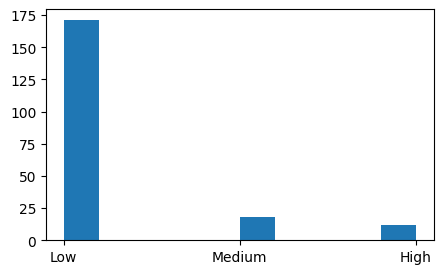

In [88]:
bins = np.linspace(min(df_clean["price"]), max(df_clean["price"]), 4)

group_names = ["Low", "Medium", "High"]

df_clean["price_binned"] = pd.cut(df_clean["price"], bins, labels=group_names, include_lowest=True)

plt.figure(figsize=(5,3))
plt.hist(df_clean["price_binned"])

plt.show()


In [91]:
pd.get_dummies(df_clean["fuel_type"]).head()

,diesel,gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


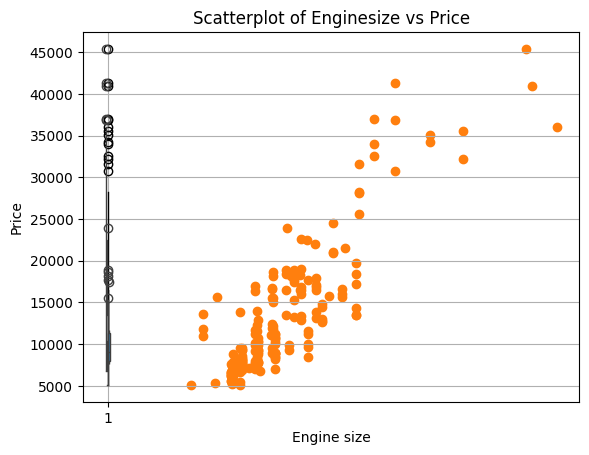

In [94]:
plt.boxplot(df_clean['price'])

sns.boxplot(x ='drive_wheels', y ='price', data = df_clean)

plt.scatter(df_clean['engine_size'], df_clean['price'])
plt.title('Scatterplot of Enginesize vs Price')
plt.xlabel('Engine size')
plt.ylabel('Price')
plt.grid()
plt.show()

In [95]:
test = df_clean[['drive_wheels', 'body_style', 'price']]
data_grp = test.groupby(['drive_wheels', 'body_style'],
                         as_index = False).mean()

data_grp

,drive_wheels,body_style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


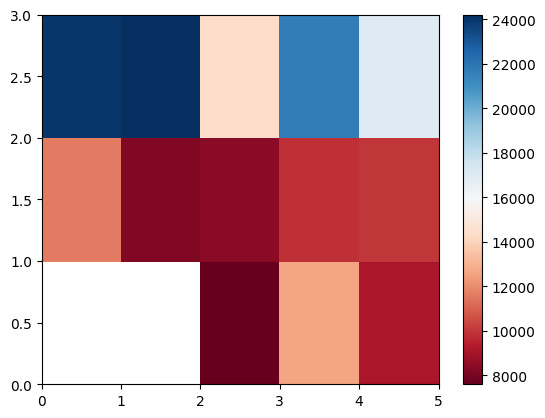

In [99]:
data_pivot = data_grp.pivot(index = 'drive_wheels',
                            columns = 'body_style')
data_pivot

plt.pcolor(data_pivot, cmap ='RdBu')
plt.colorbar()
plt.show()

F_onewayResult(statistic=np.float64(0.19744030127462606), pvalue=np.float64(0.6609478240622193))


(0.0, 53242.06191611136)

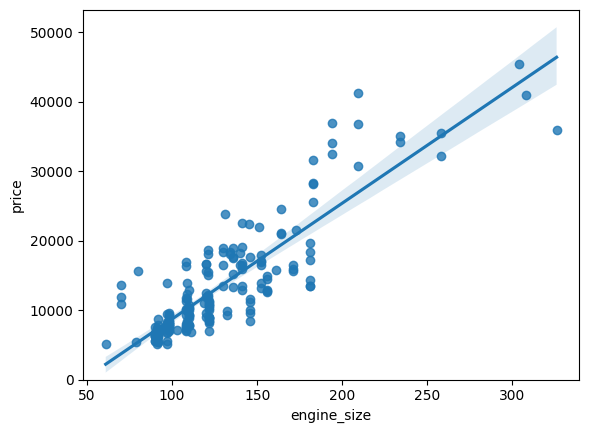

In [101]:
data_annova = df_clean[['make', 'price']]
grouped_annova = data_annova.groupby(['make'])
annova_results_l = sp.stats.f_oneway(
                             grouped_annova.get_group('honda')['price'],
                             grouped_annova.get_group('subaru')['price']
                                    )
print(annova_results_l)

sns.regplot(x ='engine_size', y ='price', data = df_clean)
plt.ylim(0, )

In [102]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(
    endog=df_clean['price'],
    groups=df_clean['drive_wheels'],
    alpha=0.05
)

print(tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj    lower      upper    reject
------------------------------------------------------------
   4wd    fwd  -996.2203 0.8974 -6302.5087   4310.068  False
   4wd    rwd  9516.6133 0.0001  4114.6082 14918.6184   True
   fwd    rwd 10512.8337    0.0  8367.9755 12657.6919   True
------------------------------------------------------------


In [103]:
from scipy.stats import ttest_ind

grouped = df_clean.groupby('drive_wheels')

fwd = grouped.get_group('fwd')['price']
rwd = grouped.get_group('rwd')['price']
fourwd = grouped.get_group('4wd')['price']

print("fwd vs rwd:", ttest_ind(fwd, rwd, equal_var=False))
print("fwd vs 4wd:", ttest_ind(fwd, fourwd, equal_var=False))
print("rwd vs 4wd:", ttest_ind(rwd, fourwd, equal_var=False))

fwd vs rwd: TtestResult(statistic=np.float64(-9.617792620835084), pvalue=np.float64(2.464998058650369e-15), df=np.float64(86.90741506985731))
fwd vs 4wd: TtestResult(statistic=np.float64(-0.828340686840892), pvalue=np.float64(0.43145084781413134), df=np.float64(8.014877617944784))
rwd vs 4wd: TtestResult(statistic=np.float64(6.078142135488121), pvalue=np.float64(4.33127125141853e-06), df=np.float64(21.67181616577023))
